# Alpha Diversity

## What is alpha diversity?

- Alpha diversity is a measure of the unique species (or taxonomic units) existing within one sample. 

Measurements of alpha diversity can be broken into two categories - richness and evenness. **Richness** is how most people think of diversity, as it describes the number of unique species in a sampling location. **Evenness**, on the other hand is a measure of how evenly the organisms in a community are distributed across the different species.


### An example

Suppose sampling location A harbors 10 unique species, and location B harbors 25 unique species. Location B would be considered to have higher richness than sample A.

However, if each of location A's species had a population of 2 (e.g. 2 foxes, 2 cats, 2 dogs, etc...), but location B was dominated by one species (e.g. 200 foxes, 1 cat, 1 dog, 1 horse, 1 proboscis monkey, 1 thorny dragon, etc...), we could say that location A has higher richness than location B.

If this isn't super clear yet, don't worry! There will be more examples as we work through this chapter.

## Why do we care about alpha diversity?

When thinking about the health of a microbial community, it's important to consider factors that encourage stability, as a stable community is one that is not as susceptible to large perturbations by invading species or a lack of nutrients. 

[Konopka](https://www.nature.com/articles/ismej200988) outlines the importance of high alpha diversity for community stability, notably that high diversity encourages community resistance and resilience.

### Resistance
Resistance is how little a community changes in response to some stress. For example, if you push on the side of a massive boulder, it is resistant to moving. However, if you push a tennis ball, it rolls away and is not resistant to moving.

### Resilience

Resilience is how able a community that has been perturbed can return to its previous (theoretically homeostatic) state. Resilience depends on how well the community can keep performing the functions that it needs after the perturbation, which is reliant on functional diversity and functional redundancy.

- **Functional diversity**
    - Functional diversity is the diversity (or richness) of functions that can be performed by a community.
    - High richness is associated with higher functional diversity.
- **Functional redundancy**
    - Functional redundancy is how well a community can keep performing a function if one individual or species that performs it is removed.
    - High richness and evenness are associated with functional redundancy.

For an example of community resilience, let's consider that you live on a theoretical commune. If you only have one way of procuring food (picking berries), what happens if the berries stop growing? There's no way to get food anymore! It would be a better idea to also grow some beans and wheat, or to hunt as well. A commune that has multiple methods of getting food has higher functional diversity than a commune with just one method of food procurement, and that commune is thus more resilient to drought or other challenges in getting food. 

Additionally, consider that your commune only has one person who knows how to make medicine. What happens when that person gets whisked away while swimming in the river? It would make a lot more sense to have another person who can step in to make the medicine. This is an example of functional redundancy. If multiple people/species can perform the same function, you don't have to worry as much about losing one individual/species, as the community can keep working like before.

### TODO: resistance/resilience simluation?

## How do we quantify alpha diversity?

There are multiple metrics for quantifying alpha diversity. Common metrics include:
- Observed features
- Shannon's diversity index
- Chao1 diversity
- Faith's phylogenetic diversity
- Pielou's evenness

These metrics can be divided into quantitative vs qualitative, phylogenetic vs non-phylogenetic, and richness vs evenness.

**Classifications:** Qualitative metrics are only concerned with whether a taxon is present or absent, but quantitative metrics take the abundances of each taxon into account. The distinction between phylogenetic vs non-phylogenetic metrics is based on whether they utilize a phylogenetic tree.


### Observed features

To start, observed features (also called observed operational taxonomic units, or observed OTUs) is the simplest way of calculating richness. Each taxon that we observe in a sample is the number of observed OTUs. We can calculate observed features as such:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def calc_observed_features(populations):
    """
    This function returns the observed features for a sample.
    The input should be a list, ndarray, or pd.Series.
    """
    # make it a list to be sure
    populations = list(populations)
    
    # initialize our observed features variable as 0
    observed_features = 0
    
    # for each taxon, if it's greater than 1, add 1 to observed features
    for tax in populations:
        if tax > 0:
            observed_features += 1
            
    return observed_features

In [71]:
populations = [12, 2, 0, 52, 0, 7]
data = pd.Series(populations, index = ["cats", "foxes", "whales", "frogs", "sharks","dogs"])

print(data, "\n")

observed_features = calc_observed_features(data)
print(f"Observed features: {observed_features}")

cats      12
foxes      2
whales     0
frogs     52
sharks     0
dogs       7
dtype: int64 

Observed features: 4


As could be expected, the value for observed features will grow linearly with the number of taxa present. 

Because it does not depend on how many of each taxon are present, and because it does not depend on phylogeny, observed features is a qualitative, non-phylogenetic measure of richness.

Additionally, it can be calculated using scikit-bio's implementation (you don't have to write your own function).

In [72]:
from skbio.diversity.alpha import observed_otus

In [74]:
print(f"Scikit-bio: {observed_otus(populations)}")
print(f"Our function: {observed_features}")

Scikit-bio: 4
Our function: 4


### Shannon's diversity index

Shannon's diversity index is calculated by summing the relative abundance of a certain taxa ($p_i$) times the natural log of its relative abundance, and can be written as such: 

$$H = -\sum p_i \ln p_i$$

Consider a community that contains only one species. In this case, p_i would equal 1, and 
$$ H = -1 \times ln(1) = -1 \times 0 = 0 $$

What happens if we add more species? Let's investigate with code!

In [28]:
def calc_shannon(populations):
    """
    When given a ndarray of population counts for a sample, 
    this function returns the shannon diversity index of that sample.
    """
    # divide each element of the populations array by the sum
    # this converts it to relative abundances
    populations /= populations.sum()
    
    # create a shannon_diversity variable
    shannon_diversity = 0
    
    # take the sum of p_i * ln(p_i) for all counts
    for count in populations:
        shannon_diversity += ( count*np.log(count) )
    
    # make it negative
    shannon_diversity *= -1
    
    return shannon_diversity

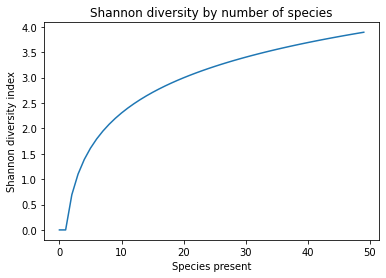

In [48]:
# initialize an empty list
shannon_values = []

# from 0 to 50, make an array of ones with a length = i
for i in range(50):
    populations = np.ones(i, dtype=float)
    
    # calculate shannon diversity for each one, then add it to the list
    shannon_diversity = calc_shannon(populations)
    shannon_values.append(shannon_diversity)
    
# plot it out
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(range(50), shannon_values)
ax.set_title("Shannon diversity by number of species")
ax.set_xlabel("Species present")
ax.set_ylabel("Shannon diversity index")
plt.show()

One can see from this figure that as the number of species present increases, the Shannon diversity index increases, but it isn't a purely linear relationship.

What happens when most of the population is made up by one species? Let's find out again!

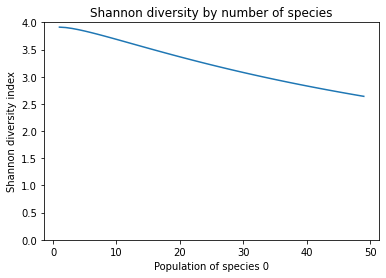

In [52]:
# initialize an empty list
shannon_values = []

# from 0 to 50, make population of species 0 = i
for i in range(1,50):
    populations = np.ones(50, dtype=float)
    populations[0] = i
    
    
    # calculate shannon diversity for each one, then add it to the list
    shannon_diversity = calc_shannon(populations)
    shannon_values.append(shannon_diversity)
    
# plot it out
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(range(1,50), shannon_values)
ax.set_title("Shannon diversity by number of species")
ax.set_xlabel("Population of species 0")
ax.set_ylabel("Shannon diversity index")
ax.set_ylim(0,4)
plt.show()

In this case, we can see that Shannon's diversity decreases as one species begins to dominate the community. Shannon diversity is primarily used as a metric for richness, but it is affected by how even the community is. Because it does not consider phylogenetic similarity of the taxa, but it does consider the populations of each taxon, Shannon diversity is a non-phylogenetic, quantitative index.

Lastly, there is a function implemented in scikit-bio to calculate Shannon's diversity. You can see below that it returns the same value as our implementation of the function.

In [75]:
from skbio.diversity.alpha import shannon

In [76]:
populations = np.ones(50)
print(f"Scikit-bio: {shannon(populations, base=np.e)}")

print(f"Our function: {calc_shannon(populations)}")

Scikit-bio: 3.9120230054281455
Our function: 3.912023005428145


### Faith's phylogenetic diversity

Faith's phylogenetic diversity is - you guessed it - our first phylogenetic alpha diversity metric! Faith's PD is a quantitative, phylogenetic richness metric. We won't write our own function because it would be a little more detailed than we want for this chapter.

Let's consider the phylogenetic diversity of two people's shopping carts.

To start, we need a phylogenetic tree. Typically you'll be reading a file, not a string, so don't worry about having to decipher `food_tree_str`. It's just a Newick formatted phylogenet tree. If reading a file, you can use `TreeNode.read("path/to/tree")`.

In [106]:
from skbio import TreeNode
from io import StringIO

In [107]:
food_tree_str = """(((apples,bananas)fruit,(broccoli,spinach)vegetables)produce,
                     (chicken,beef)meat,(milk,(orange_juice,apple_juice)juice)beverages,
                     (cookies)sweets)items;"""

food_tree = TreeNode.read(StringIO(food_tree_str))

print(food_tree.ascii_art())

for node in food_tree.postorder():
    node.length = 1

                              /-apples
                    /fruit---|
                   |          \-bananas
          /produce-|
         |         |          /-broccoli
         |          \vegetables
         |                    \-spinach
         |
         |          /-chicken
         |-meat----|
-items---|          \-beef
         |
         |          /-milk
         |-beverages
         |         |          /-orange juice
         |          \juice---|
         |                    \-apple juice
         |
          \sweets-- /-cookies


In [108]:
foods = ["apples", "bananas",
         "broccoli", "spinach",
         "chicken", "beef",
         "milk", "orange juice", "apple juice", 
         "cookies"]

person_1 = [1, 1,
            1, 1,
            1, 1,
            0, 0, 0,
            0]
person_2 = [1, 0, 
            1, 0,
            1, 0,
            1, 0, 1,
            1]

data = pd.DataFrame([person_1, person_2], columns=foods)
data

,apples,bananas,broccoli,spinach,chicken,beef,milk,orange juice,apple juice,cookies
0,1,1,1,1,1,1,0,0,0,0
1,1,0,1,0,1,0,1,0,1,1


In the above example, do you expect person 0 or person 1 to have a higher Faith's PD? They both have the same number of features (or different foods in this case), but which one's food is more spread out across the phylogenetic tree?

In [109]:
from skbio.diversity.alpha import faith_pd

In [110]:
faith_0 = faith_pd(data.loc[0], otu_ids=foods, tree=food_tree, validate=False)
faith_1 = faith_pd(data.loc[1], otu_ids=foods, tree=food_tree, validate=False)
features_0 = observed_otus(data.loc[0])
features_1 = observed_otus(data.loc[1])

print(f"Person 0 Faith PD = {faith_0}; observed features = {features_0}")
print(f"Person 1 Faith PD = {faith_1}; observed features = {features_1}")

Person 0 Faith PD = 11.0; observed features = 6
Person 1 Faith PD = 14.0; observed features = 6


If you guess that person

## Interactive example/Homework
